# <a name="inspection"> Tree Based Models HomeWork

## <a name="inspection"> Imports for this homework

Packages:

* `numpy` is a package for scientific computing in python.
* `pandas` is a package for work with relational or labeled and it is used for data analysis in python.
* `matplotlib` is a package for creating static, animated, and interactive visualizations in Python
* `seaborn` is package for creating for making statistical graphics in python.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <a name="inspection"> 1.0 EDA

In [ ]:
df_classification = pd.read_csv('data_1')
df_regression = pd.read_csv('data_2', delimiter=';', na_values=-200, decimal = ',')

## <a name="inspection"> 2.0 Data Preparation

### Regression Data Preparation

* Now right from the start i have transformed -200 value into NaN.
* Then i will drop columns that have huge ammount of missing data.
* Other types of missing data will be imputed based on % of their missing values.
* And replace date/time data for index.



#### Dealing with Missing data

In [ ]:
df_regression.head(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


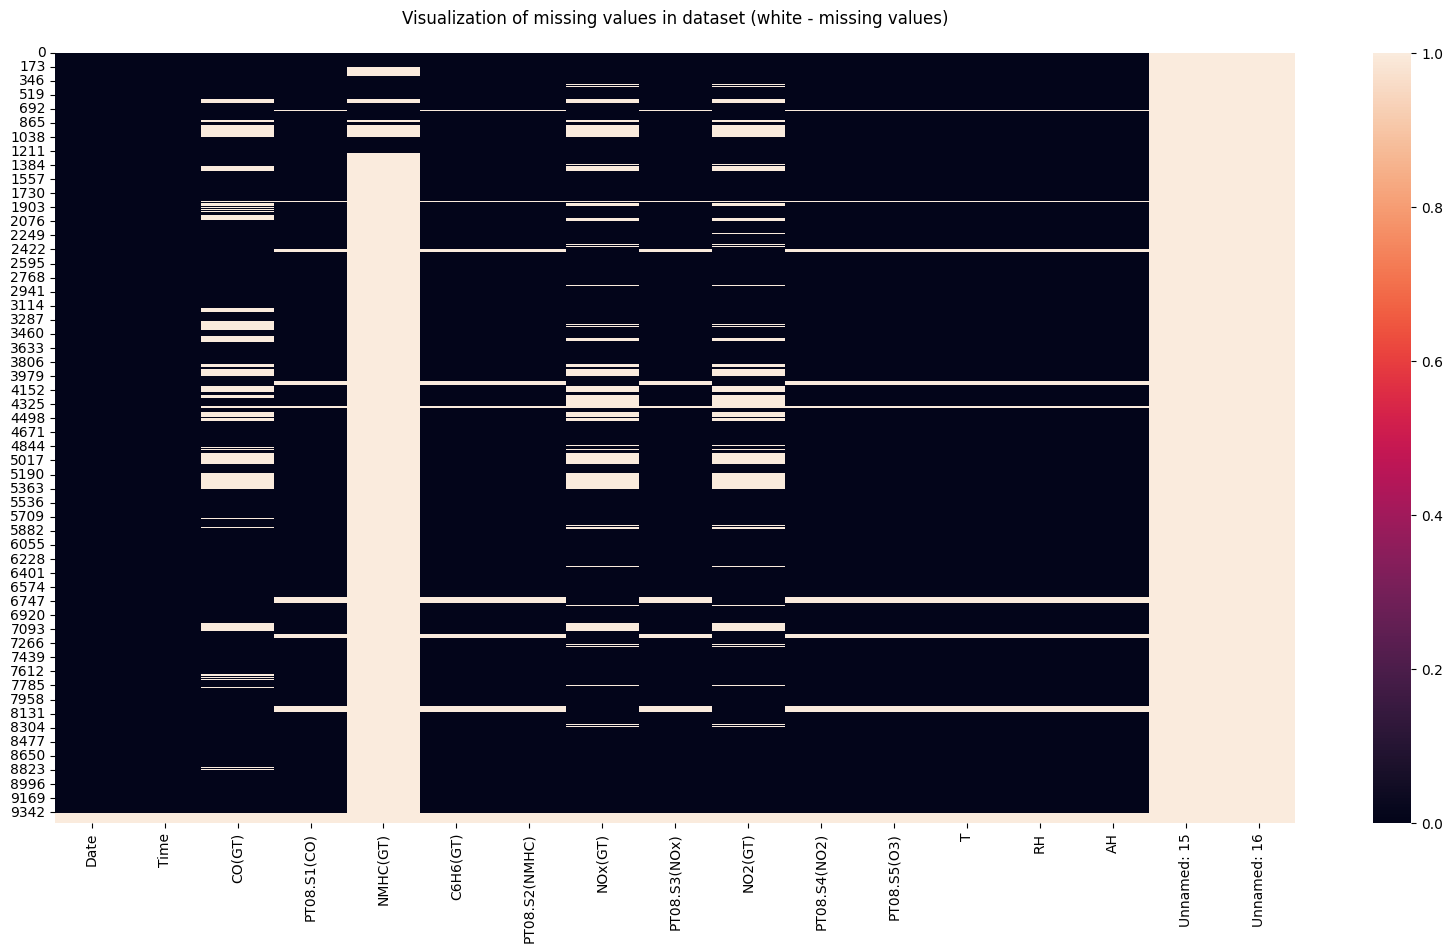

In [ ]:
plt.figure(figsize=(20, 10));
sns.heatmap(df_regression.isna());
plt.title('Visualization of missing values in dataset (white - missing values)\n');

In [ ]:
df_regression.drop(['Unnamed: 15','Unnamed: 16','NMHC(GT)'], axis = 1, inplace = True)

In [ ]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


Unlike for linear regression homework i will leave DateTime feature and spearate it into each chategory instead to put them for index.

In [ ]:
# Converting date and time into datetime
df_regression['Datetime'] = pd.to_datetime(df_regression['Date'] + ' ' + df_regression['Time'], format='%d/%m/%Y %H.%M.%S')

# Extract useful features from Datetime
df_regression['Hour'] = df_regression['Datetime'].dt.hour
df_regression['DayOfWeek'] = df_regression['Datetime'].dt.dayofweek
df_regression['Month'] = df_regression['Datetime'].dt.month
df_regression['Year'] = df_regression['Datetime'].dt.year
df_regression = df_regression.drop(['Date', 'Time', 'Datetime'], axis=1)

In [ ]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   C6H6(GT)       8991 non-null   float64
 3   PT08.S2(NMHC)  8991 non-null   float64
 4   NOx(GT)        7718 non-null   float64
 5   PT08.S3(NOx)   8991 non-null   float64
 6   NO2(GT)        7715 non-null   float64
 7   PT08.S4(NO2)   8991 non-null   float64
 8   PT08.S5(O3)    8991 non-null   float64
 9   T              8991 non-null   float64
 10  RH             8991 non-null   float64
 11  AH             8991 non-null   float64
 12  Hour           9357 non-null   float64
 13  DayOfWeek      9357 non-null   float64
 14  Month          9357 non-null   float64
 15  Year           9357 non-null   float64
dtypes: float64(16)
memory usage: 1.2 MB


In [ ]:
df_regression.head(10)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,DayOfWeek,Month,Year
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0,2.0,3.0,2004.0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0,2.0,3.0,2004.0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0,2.0,3.0,2004.0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0,2.0,3.0,2004.0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0,2.0,3.0,2004.0
5,1.2,1197.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,23.0,2.0,3.0,2004.0
6,1.2,1185.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,0.0,3.0,3.0,2004.0
7,1.0,1136.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,1.0,3.0,3.0,2004.0
8,0.9,1094.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,2.0,3.0,3.0,2004.0
9,0.6,1010.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,3.0,3.0,3.0,2004.0


Now to see % of missing data that remained. For this purpose i will reuse function from my LR HW.

In [ ]:
def missing_values_table(df):
    """
    Generate a table of missing values in a dataset.

    Parameters:
    - df (pd.DataFrame): Input dataframe.
    - placeholder (scalar, optional): Value to be replaced with NaN.
    - sort_descending (bool): Sort the output by the percentage of missing values in descending order.
    - round_decimals (int): Number of decimals to round percentages.

    Returns:
    - pd.DataFrame: A DataFrame with columns for missing value counts and percentages.
    """
    # Part to calculate missing values and their percentages
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * df.isnull().sum() / len(df)

    # Create the summary table
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(columns = {
        0 : 'Missing values',
        1 : 'Missing % of total values'
        })

    miss_val_table_ren_columns = miss_val_table_ren_columns[
        miss_val_table_ren_columns.iloc[:,1] != 0
        ].sort_values('Missing % of total values', ascending=False).round(2)

    return miss_val_table_ren_columns

print("Missing values in train set:")
print(missing_values_table(df_regression))

Missing values in train set:
               Missing values  Missing % of total values
CO(GT)                   1797                      18.97
NO2(GT)                  1756                      18.54
NOx(GT)                  1753                      18.51
PT08.S1(CO)               480                       5.07
C6H6(GT)                  480                       5.07
PT08.S2(NMHC)             480                       5.07
PT08.S3(NOx)              480                       5.07
PT08.S4(NO2)              480                       5.07
PT08.S5(O3)               480                       5.07
T                         480                       5.07
RH                        480                       5.07
AH                        480                       5.07
Hour                      114                       1.20
DayOfWeek                 114                       1.20
Month                     114                       1.20
Year                      114                       1.20


To avoid modifying data from target variable due to low % of missing that i will drop those rows.

In [ ]:
df_regression.drop(df_regression[df_regression['C6H6(GT)'].isnull()].index, axis = 0, inplace = True)

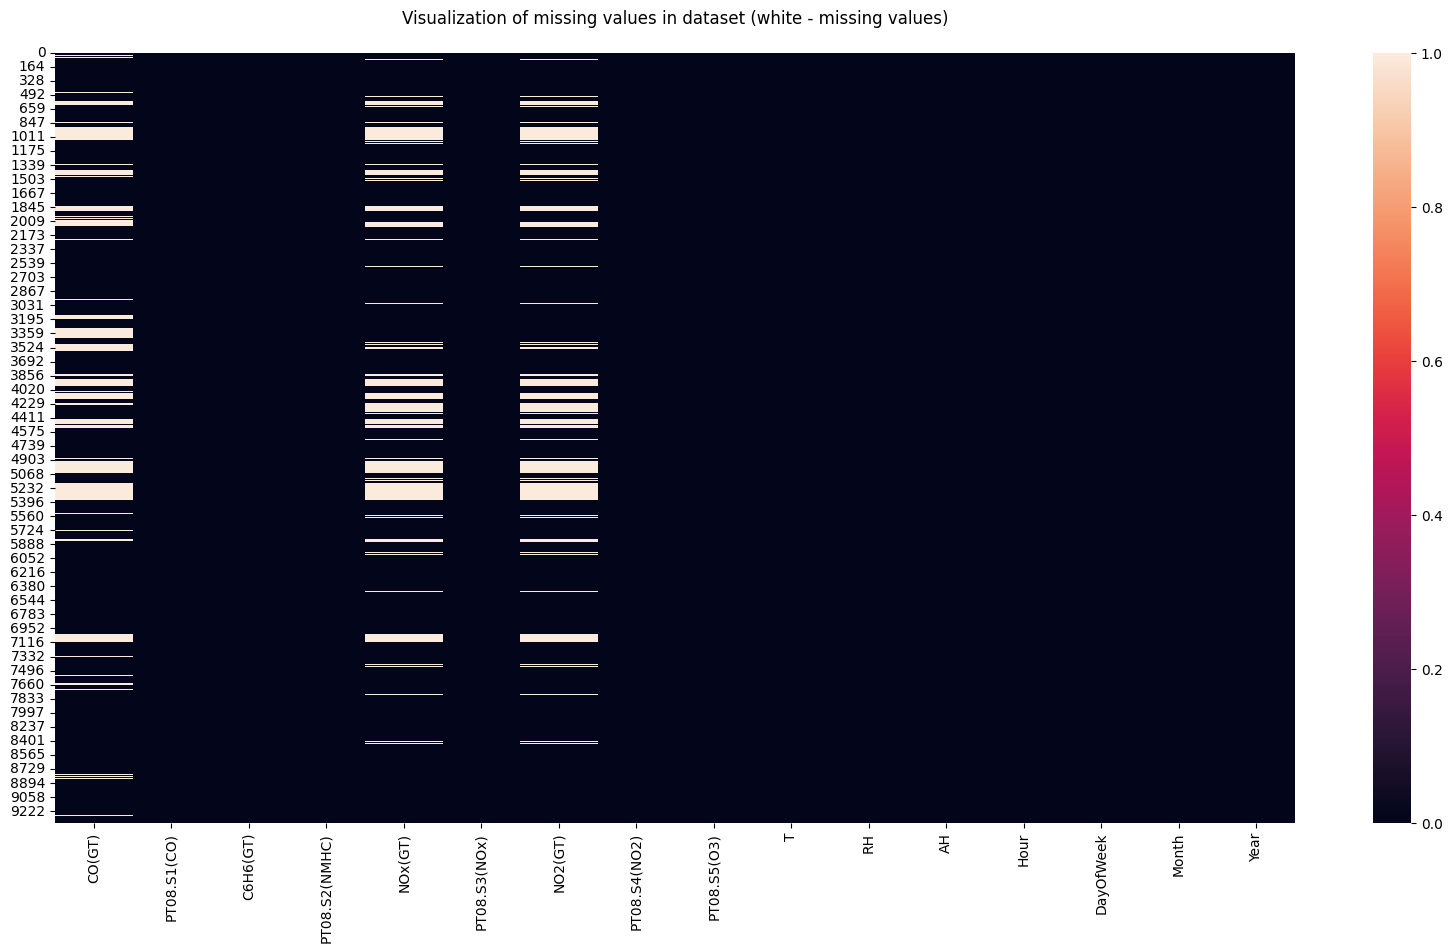

In [ ]:
plt.figure(figsize=(20, 10));
sns.heatmap(df_regression.isna());
plt.title('Visualization of missing values in dataset (white - missing values)\n');

In [ ]:
missing_values_table(df_regression)

,Missing values,Missing % of total values
CO(GT),1647,18.32
NO2(GT),1598,17.77
NOx(GT),1595,17.74


These are the only ones i need now to deal. Due to ~20% of missing data i alreaddy know from my first homework that filling missing values with median is good also when tested with highly corelated features between our target C6H6 and PT08.S2 i know that min/max scaler will be best choice since corelation is preserved between them.

* This time to split data and avoid data leaking.
* sort data by index and split it into 80% for training and 20%  for testing

In [ ]:
train_percentage = 0.8
split_index = int(len(df_regression) * train_percentage)

df_regression = df_regression.sort_index()

train_reg = df_regression.iloc[:split_index, :]
test_reg = df_regression.iloc[split_index:, :]

* Same approach from regression HW to fill missing data with median value.

In [ ]:
for feature in train_reg.columns:
    train_reg[feature] = train_reg[feature].fillna(train_reg[feature].median())

for feature in test_reg.columns:
    test_reg[feature] = test_reg[feature].fillna(test_reg[feature].median())

<ipython-input-20-e1764055156a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_reg[feature] = train_reg[feature].fillna(train_reg[feature].median())
<ipython-input-20-e1764055156a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_reg[feature] = test_reg[feature].fillna(test_reg[feature].median())


In [ ]:
train_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 7471
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7192 non-null   float64
 1   PT08.S1(CO)    7192 non-null   float64
 2   C6H6(GT)       7192 non-null   float64
 3   PT08.S2(NMHC)  7192 non-null   float64
 4   NOx(GT)        7192 non-null   float64
 5   PT08.S3(NOx)   7192 non-null   float64
 6   NO2(GT)        7192 non-null   float64
 7   PT08.S4(NO2)   7192 non-null   float64
 8   PT08.S5(O3)    7192 non-null   float64
 9   T              7192 non-null   float64
 10  RH             7192 non-null   float64
 11  AH             7192 non-null   float64
 12  Hour           7192 non-null   float64
 13  DayOfWeek      7192 non-null   float64
 14  Month          7192 non-null   float64
 15  Year           7192 non-null   float64
dtypes: float64(16)
memory usage: 955.2 KB


In [ ]:
test_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1799 entries, 7472 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         1799 non-null   float64
 1   PT08.S1(CO)    1799 non-null   float64
 2   C6H6(GT)       1799 non-null   float64
 3   PT08.S2(NMHC)  1799 non-null   float64
 4   NOx(GT)        1799 non-null   float64
 5   PT08.S3(NOx)   1799 non-null   float64
 6   NO2(GT)        1799 non-null   float64
 7   PT08.S4(NO2)   1799 non-null   float64
 8   PT08.S5(O3)    1799 non-null   float64
 9   T              1799 non-null   float64
 10  RH             1799 non-null   float64
 11  AH             1799 non-null   float64
 12  Hour           1799 non-null   float64
 13  DayOfWeek      1799 non-null   float64
 14  Month          1799 non-null   float64
 15  Year           1799 non-null   float64
dtypes: float64(16)
memory usage: 238.9 KB


### Classification Data Preparation

In [ ]:
df_classification.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

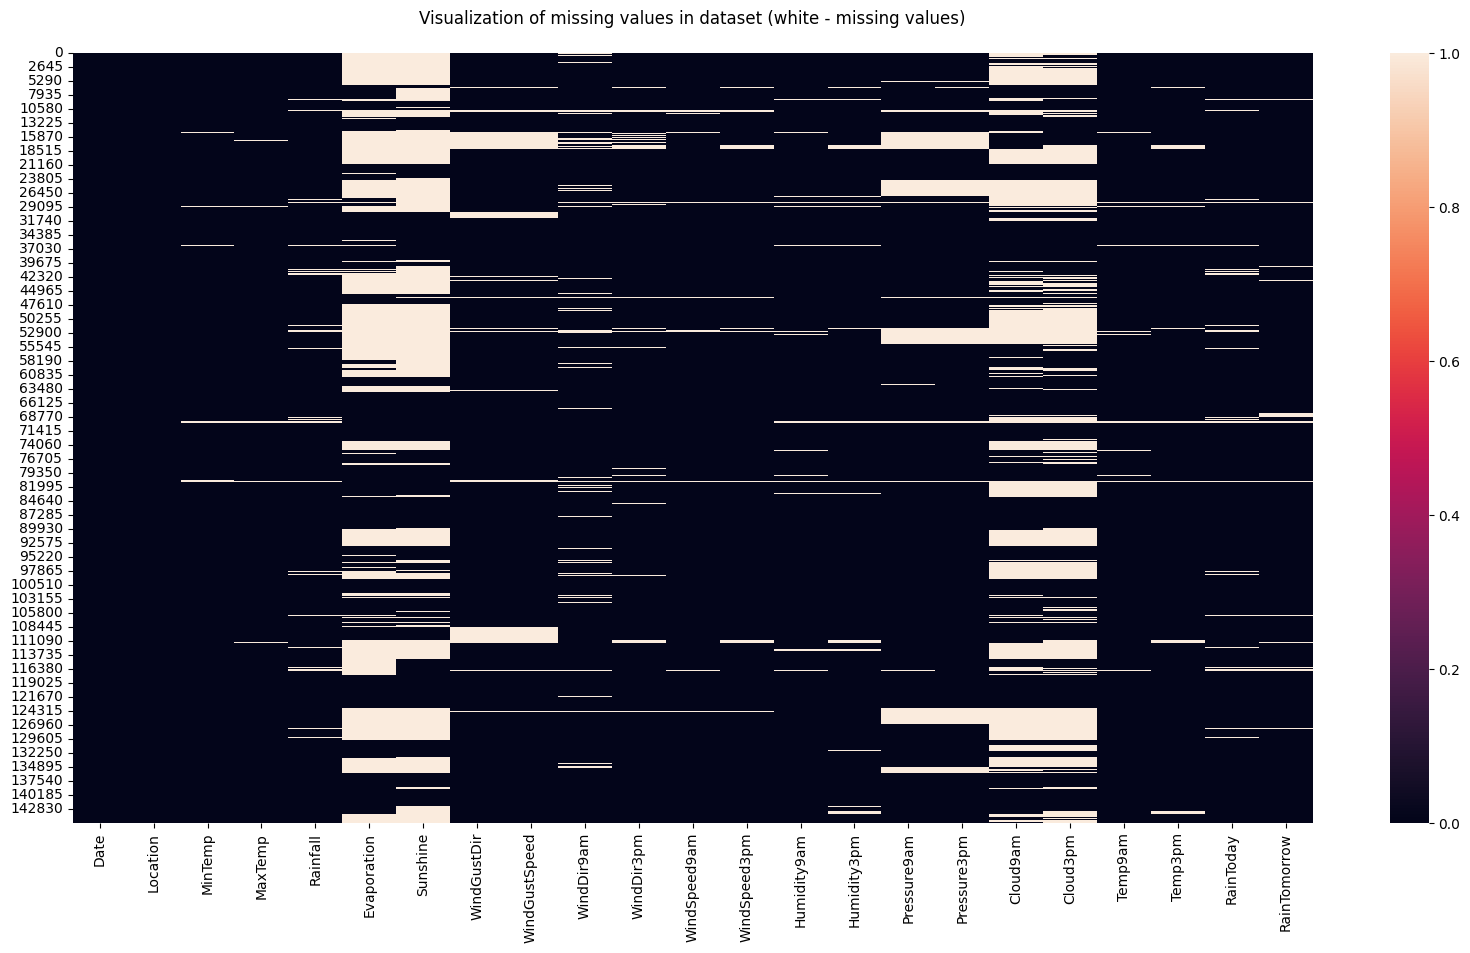

In [ ]:
plt.figure(figsize=(20, 10));
sns.heatmap(df_classification.isna());
plt.title('Visualization of missing values in dataset (white - missing values)\n');

In [ ]:
def missing_values_table(df):
    """
    Generate a table of missing values in a dataset.

    Parameters:
    - df (pd.DataFrame): Input dataframe.
    - placeholder (scalar, optional): Value to be replaced with NaN.
    - sort_descending (bool): Sort the output by the percentage of missing values in descending order.
    - round_decimals (int): Number of decimals to round percentages.

    Returns:
    - pd.DataFrame: A DataFrame with columns for missing value counts and percentages.
    """
    # Part to calculate missing values and their percentages
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * df.isnull().sum() / len(df)
    data_types = df.dtypes

    # Create the summary table
    miss_val_table = pd.concat([miss_val, miss_val_percent, data_types], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(columns = {
        0 : 'Missing values',
        1 : 'Missing % of total values',
        'dtype': 'Data Type'
        })

    miss_val_table_ren_columns = miss_val_table_ren_columns[
        miss_val_table_ren_columns.iloc[:,1] != 0
        ].sort_values('Missing % of total values', ascending=False).round(2)

    return miss_val_table_ren_columns

print("Missing values in train set:")
print(missing_values_table(df_classification))

Missing values in train set:
               Missing values  Missing % of total values        2
Sunshine                69835                      48.01  float64
Evaporation             62790                      43.17  float64
Cloud3pm                59358                      40.81  float64
Cloud9am                55888                      38.42  float64
Pressure9am             15065                      10.36  float64
Pressure3pm             15028                      10.33  float64
WindDir9am              10566                       7.26   object
WindGustDir             10326                       7.10   object
WindGustSpeed           10263                       7.06  float64
Humidity3pm              4507                       3.10  float64
WindDir3pm               4228                       2.91   object
Temp3pm                  3609                       2.48  float64
RainTomorrow             3267                       2.25   object
Rainfall                 3261                  

Ok here clearly i need to separate my data and deal with each category of data  separately.

In [ ]:
cat_cols = [col for col in df_classification.columns if df_classification[col].dtype == 'object']
cat_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
num_cols = [col for col in df_classification.columns if df_classification[col].dtype == 'float64']
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
df_classification = df_classification.dropna(subset=['RainTomorrow'])
missing_values_table(df_classification)

,Missing values,Missing % of total values,2
Sunshine,67816,47.69,float64
Evaporation,60843,42.79,float64
Cloud3pm,57094,40.15,float64
Cloud9am,53657,37.74,float64
Pressure9am,14014,9.86,float64
Pressure3pm,13981,9.83,float64
WindDir9am,10013,7.04,object
WindGustDir,9330,6.56,object
WindGustSpeed,9270,6.52,float64
WindDir3pm,3778,2.66,object


* due to low % of missing data for my category data i will just change missing values with unknown.

In [ ]:
df_classification[cat_cols] = df_classification[cat_cols].fillna('unknown')

This should have dealth with my category coluims with missing data.

Now to deal with my numerical data. This time  ill  use FFill unlike  in last HW  where i  used KNN imputation technique and made data  leaking mistake.

In [ ]:
# Filling continious data:

low_missing_features = ['Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'WindSpeed3pm', 'Humidity9am', 'Rainfall', 'WindSpeed9am', 'Temp9am', 'MinTemp', 'MaxTemp']
medium_missing_features = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']

# Imputing all collumns for low % of missing data using meadian.
for feature in low_missing_features:
    df_classification.loc[:, feature] = df_classification[feature].fillna(df_classification[feature].median())

# Forward fill for medium % of missing data.
for feature in medium_missing_features:
    df_classification.loc[:, feature] = df_classification[feature].ffill()

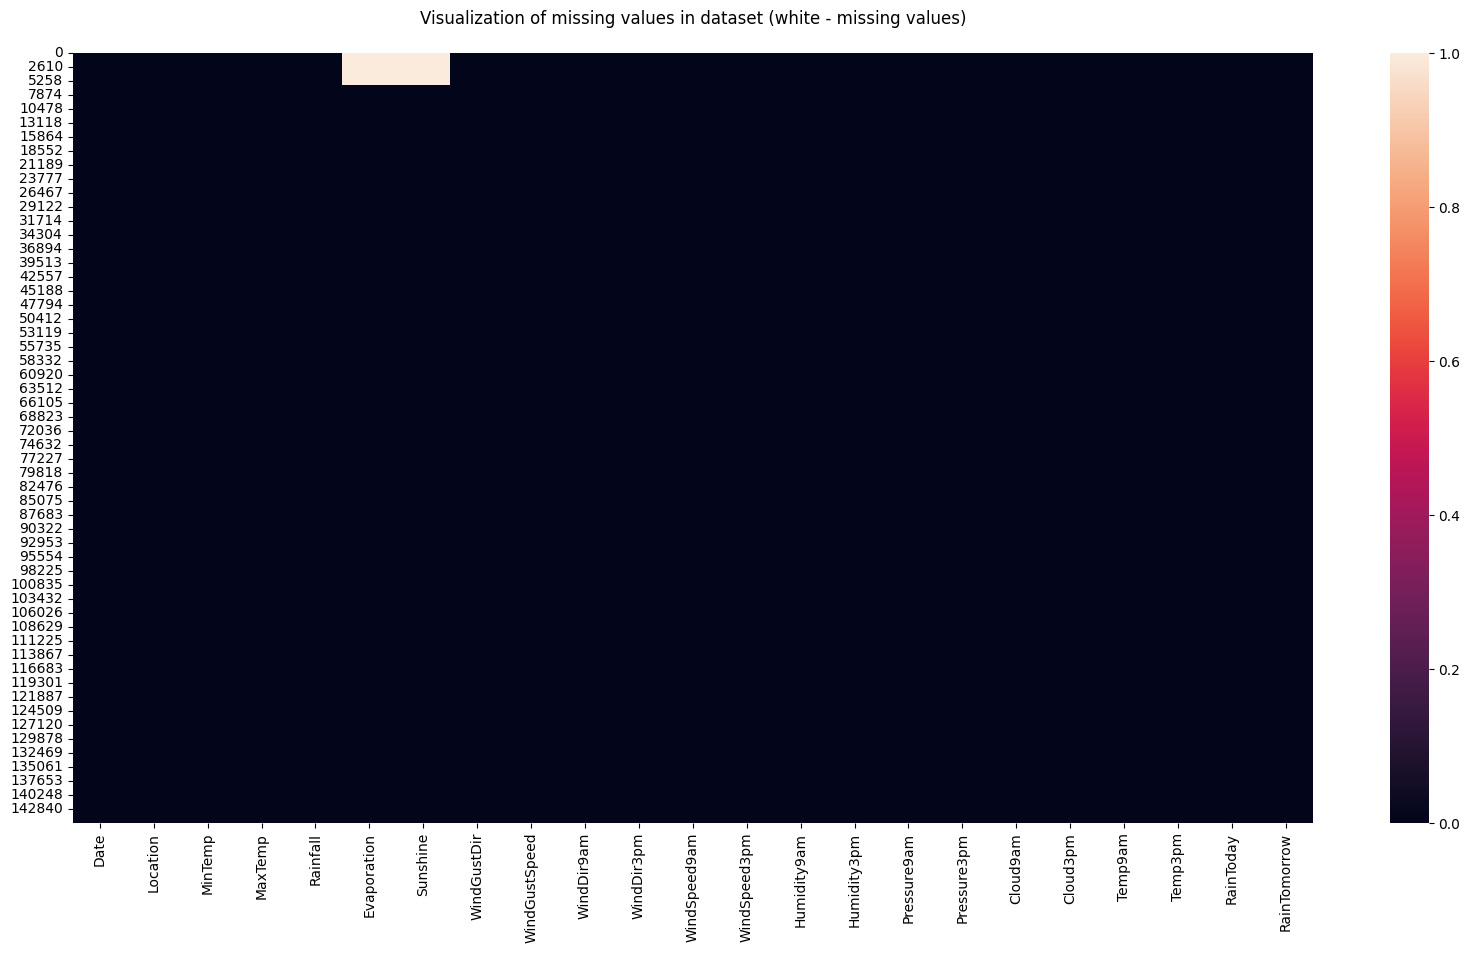

In [ ]:
plt.figure(figsize=(20, 10));
sns.heatmap(df_classification.isna());
plt.title('Visualization of missing values in dataset (white - missing values)\n');

In [ ]:
print(missing_values_table(df_classification))

             Missing values  Missing % of total values        2
Evaporation            5939                       4.18  float64
Sunshine               5939                       4.18  float64
Cloud3pm                  2                       0.00  float64


In [ ]:
df_classification.dropna(inplace=True)

In [ ]:
print(missing_values_table(df_classification))

Empty DataFrame
Columns: [Missing values, Missing % of total values, 2]
Index: []


###### Encoding

<Axes: >

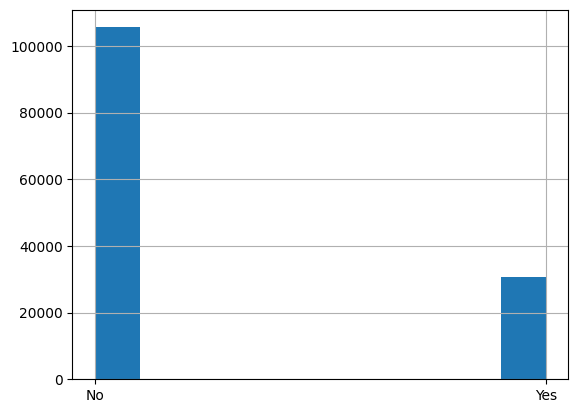

In [ ]:
df_classification['RainTomorrow'].hist()

* imbalanced data for target feature.

Now date/time will split  into numerical and then focus on encoding cat data.

In [ ]:
# Converting the 'Date' column into datetime
df_classification['Date'] = pd.to_datetime(df_classification['Date'], format='%Y-%m-%d')

# Extract features from the 'Date' column
df_classification['DayOfWeek'] = df_classification['Date'].dt.dayofweek
df_classification['Month'] = df_classification['Date'].dt.month
df_classification['Year'] = df_classification['Date'].dt.year

# Modifiy original dataframe
df_classification = df_classification.drop(['Date'], axis=1)

Now to encode categorical data

In [ ]:
# One-hot encoding for categorical columns
df_classification = pd.get_dummies(df_classification, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

# And to transform our target into 0 and 1 for No and Yes
df_classification['RainTomorrow'] = df_classification['RainTomorrow'].replace({'No': 0, 'Yes': 1}).astype('int')

<ipython-input-38-ff180feca889>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classification['RainTomorrow'] = df_classification['RainTomorrow'].replace({'No': 0, 'Yes': 1}).astype('int')


Ok now our dataframe is cleaned!

## <a name="inspection"> 3.0 Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn_evaluation import plot
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import lime
from lime import lime_tabular
import shap

In [ ]:
!pip install lime
!pip install shap
!pip install sklearn_evaluation
!pip install xgboost
!pip install interpret

#### Regression problem

##### A. Decision Tree Regressor

In [ ]:
X_train = train_reg.drop('C6H6(GT)', axis=1)
y_train = train_reg['C6H6(GT)']

# Completly separated data to test model once trained
X_test = test_reg.drop('C6H6(GT)', axis=1)
y_test = test_reg['C6H6(GT)']

model_DTR = DecisionTreeRegressor(random_state=34)
model_DTR.fit(X_train, y_train)

y_train_pred = model_DTR.predict(X_train)
y_test_pred = model_DTR.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R2 Score: {test_r2}")

Training RMSE: 2.705348877271263e-15
Test RMSE: 0.05266652828674734
Test R2 Score: 0.9999346471543589


* Ok score is deffinetly perfect one which indicates taht model is overfitting!
* Now i will try to limit tree depth and tune hyperparameters.

###### Hyperparameter Tunning DTR

Parameters to use:

* **max_depth** of the three or how deep will tree split. Have huge impact on model complexity the lower  the numbers of nodes or lower depth the more less complex model it is and therefore it can be  used to prevent model overfitting. At same time in can drastically incear to  model underfitting so in a way it is always a tradeoff.


* Trees that have smaller depth are also easier to visualise which can help a lot with intepretation.


* **Samples_split** parameter sets the minimum number of samples required to split an internal node. If a node has fewer than specified number of samples, it cannot be split further and it becomes a leaf node. Incearing values help tree not to creat too much branches while smaller values forcing tree to look into more data before spliting.
Again here best use is to test and see how it behave for different parameters.


* **min_samples_leaft** parameter sets the minimum number of samples required to be in a leaf node. It prevents the creation of leaf nodes that have small number of samples which help us filterout noise in data. Smaller values help trees to be more flexibile while higher values adding to rigidness

In [ ]:
model_DTR_1_tuned = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=34
)

model_DTR_1_tuned.fit(X_train, y_train)

y_test_pred_tuned_1 = model_DTR_1_tuned.predict(X_test)
test_rmse_tuned_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned_1))
test_r2_tuned_1 = r2_score(y_test, y_test_pred_tuned_1)

print(f"Tuned Test RMSE: {test_rmse_tuned_1}")
print(f"Tuned Test R2 Score: {test_r2_tuned_1}")

Tuned Test RMSE: 0.3026499435142658
Tuned Test R2 Score: 0.9978418763958201


* Here with max_depth set to 5, min_samples_split to  10 and leaft to 5 we still get almost perfect score.

* Probably too complex tree for the data size.

* Next step in order to prevent overfitting is to limit number od depth our tree can go and try to play with splitting criteria.

In [ ]:
model_DTR_2_tuned = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=6,
    min_samples_leaf=3,
    random_state=34
)

model_DTR_2_tuned.fit(X_train, y_train)

y_test_pred_tuned_2 = model_DTR_2_tuned.predict(X_test)
test_rmse_tuned_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned_2))
test_r2_tuned_2 = r2_score(y_test, y_test_pred_tuned_2)

print(f"Tuned Test RMSE: {test_rmse_tuned_2}")
print(f"Tuned Test R2 Score: {test_r2_tuned_2}")

Tuned Test RMSE: 1.139051807952296
Tuned Test R2 Score: 0.9694309405983645


Instead of these two separatley i  could use grid search but i find it conviniet to separate them this way so  i could draw graph easly later.

* Whith max_depth set to 3 my score is 0.969 while with max_depth set to 2 score is 0.89.
* Decreasing depth to 2 is drastic simplification of the model and can contribute to uderfiting a lot.
* for this reason i will leave it at max_depth 3.
* If i am correct and did steps right, there are no data leaking. And from this look compared to to linear regression results this model is performing %2 to %5 better. It is almost perfect with high potential to overfit.

###### Visualization of the tree with different depths

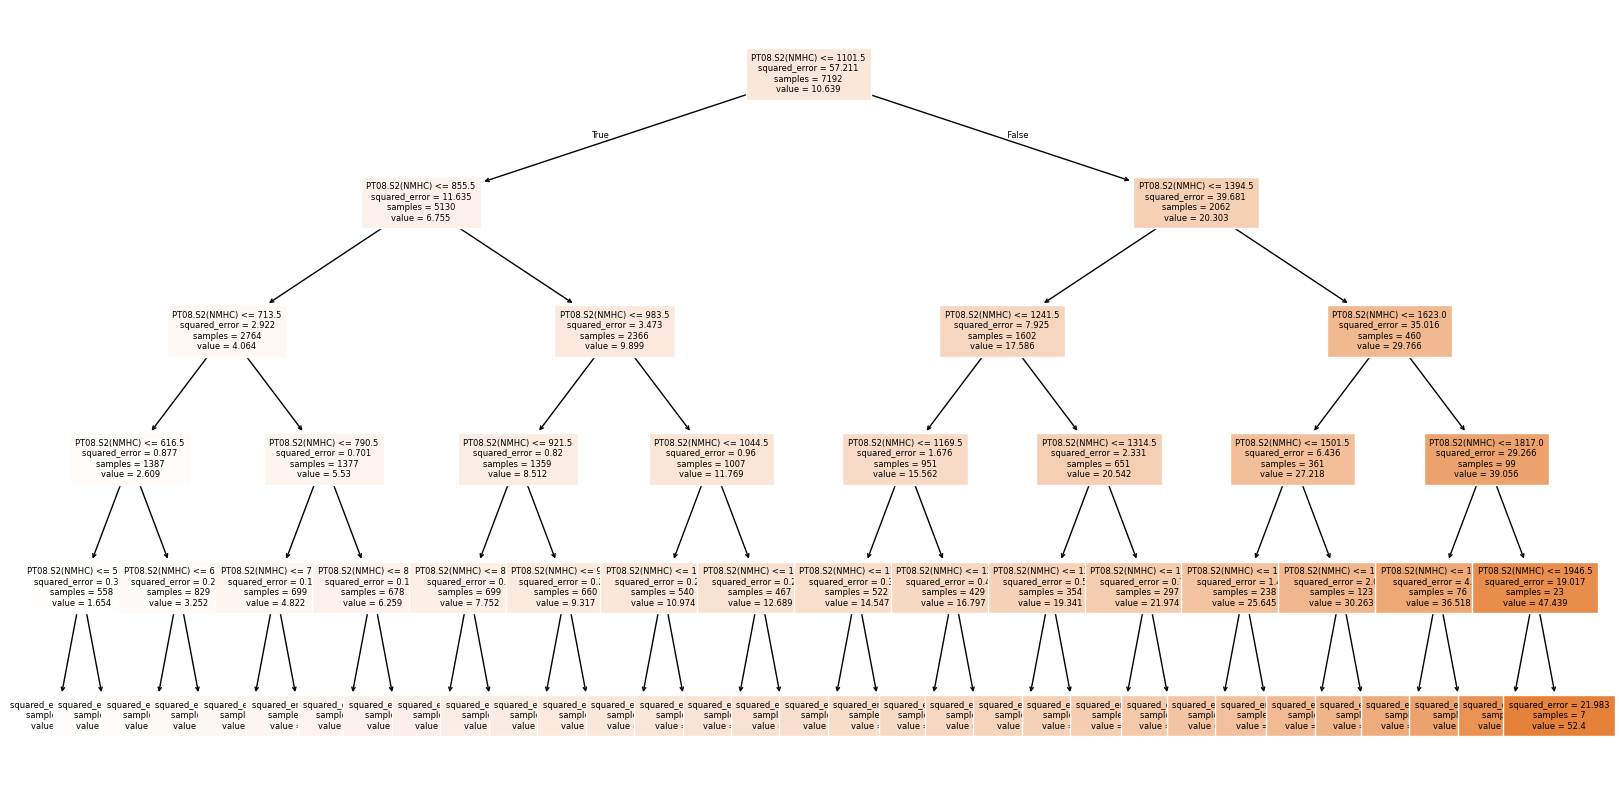

In [ ]:
# Hypertuned model with depth of the tree set to 5
plt.figure(figsize=(20, 10))
plot_tree(model_DTR_1_tuned, feature_names=X_train.columns, filled=True, fontsize=6)
plt.show()

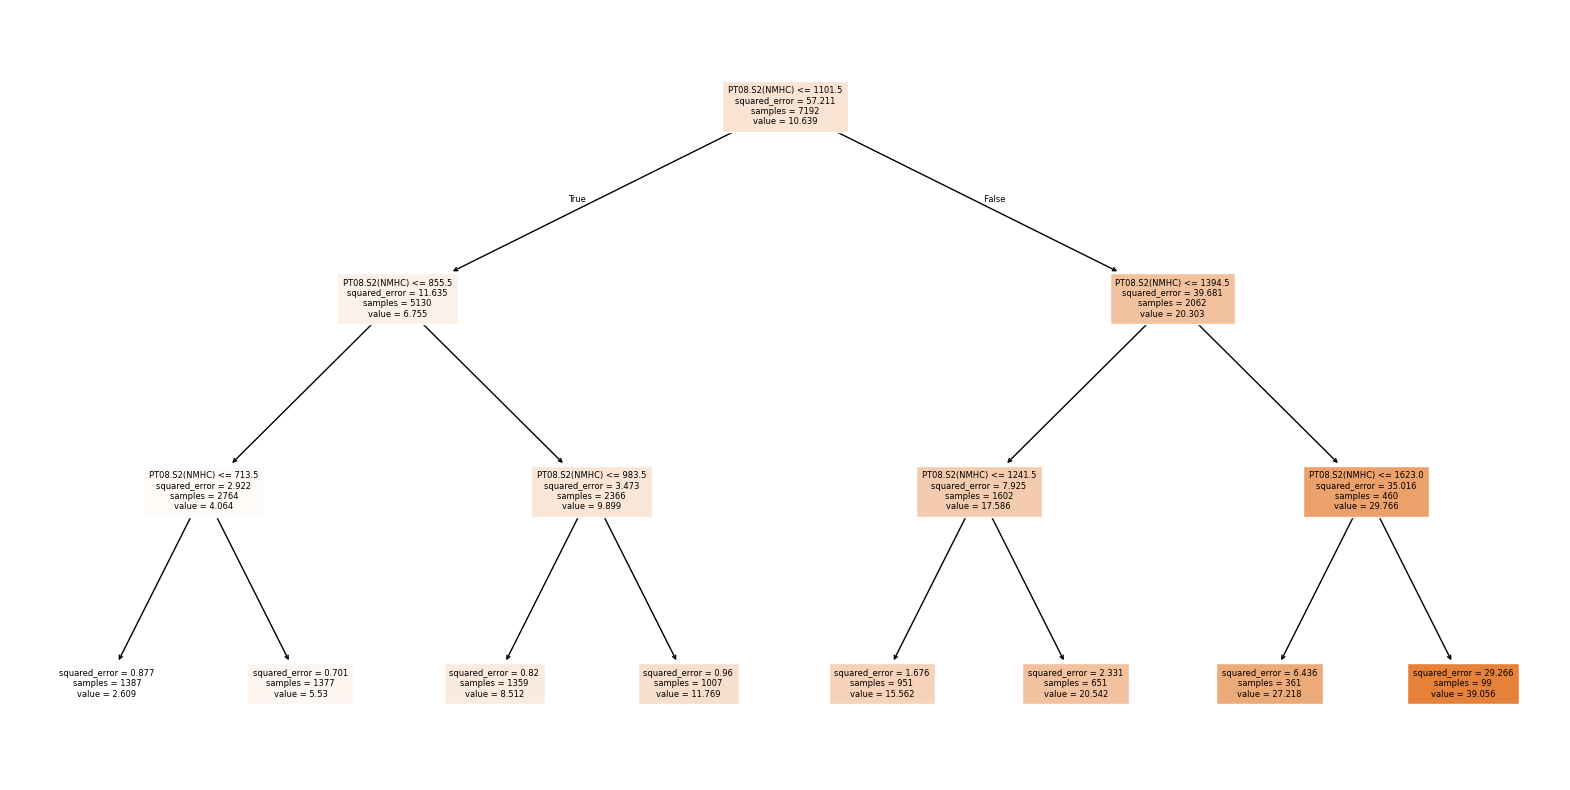

In [ ]:
# Hypertuned model with depth of the tree set to 3
plt.figure(figsize=(20, 10))
plot_tree(model_DTR_2_tuned, feature_names=X_train.columns, filled=True, fontsize=6)
plt.show()

###### Feature Importance

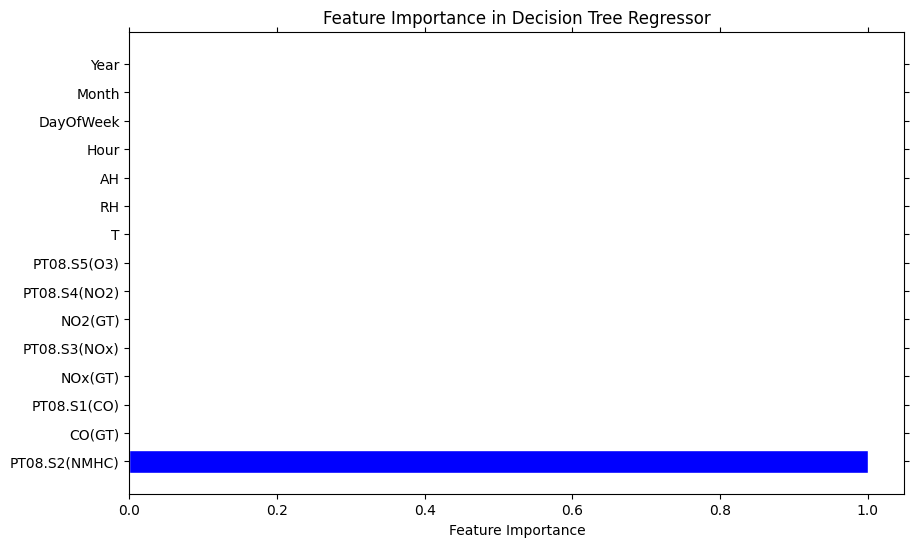

In [ ]:
feature_importances = model_DTR_2_tuned.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

* Well this feature importance  is kinda expected since it has really high corelation in regression homework analysis. Tree base  models should be imune to  a point to this corelation due to splitting criteria.

* Now i don't know should i drop that feature and retrain the model or is it ok to  keep this? (question for mentor)

I will now  use SHAP inrepretability to see both global and local importance of my feature. Lime will  not use since i am not interested only in local effect of  my features.

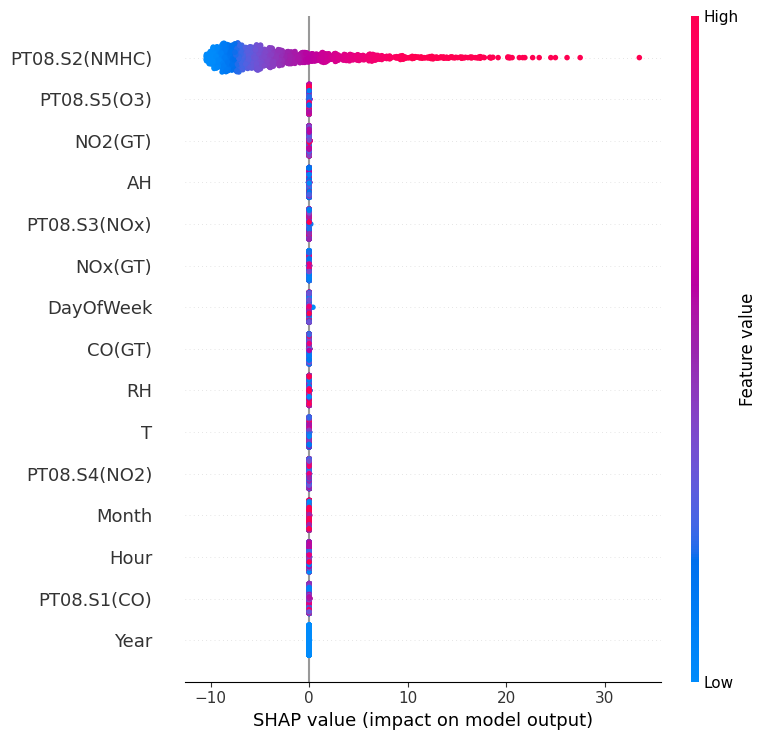

In [ ]:
explainer = shap.TreeExplainer(model_DTR)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[0], features=X_test.iloc[0])

##### B. Random ForestRegressor

In [ ]:
RF_model = RandomForestRegressor(random_state=22)

RF_model.fit(X_train, y_train)

y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R2 Score: {test_r2}")

Training RMSE: 0.07765833067799673
Test RMSE: 0.07559214455189416
Test R2 Score: 0.9998653679516613


* Again as expected R2 score is perfect like due to this time i have whole bunch of iteration of similar trees  that have high score.

* This deffinetly need to be tuned "down" probably will reduce number of estimators that create and depth also.

###### Hyperparameter Tunning RF

1. **n_estimators:** number of trees in the forest
2. **max_depth:** maximum depth of trees (to try to prevent overfitting)               
3. **min_samples_split:** minimum number of samples required to split a node      
4. **min_samples_leaf:** minimum number of samples required at a leaf node         
5. **max_features:** number of features to consider at each split      
6. **bootstrap:** bootstrap samples are used when building trees can have true/false value

In [ ]:
RF_model_1 = RandomForestRegressor(
    n_estimators=50,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=12
)

RF_model_1.fit(X_train, y_train)

y_train_pred_manual = RF_model_1.predict(X_train)
y_test_pred_manual = RF_model_1.predict(X_test)

train_rmse_manual = np.sqrt(mean_squared_error(y_train, y_train_pred_manual))
test_rmse_manual = np.sqrt(mean_squared_error(y_test, y_test_pred_manual))
test_r2_manual = r2_score(y_test, y_test_pred_manual)

print(f"Manual Model Training RMSE: {train_rmse_manual}")
print(f"Manual Model Test RMSE: {test_rmse_manual}")
print(f"Manual Model Test R2 Score: {test_r2_manual}")

Manual Model Training RMSE: 1.199057694514772
Manual Model Test RMSE: 1.722293017058774
Manual Model Test R2 Score: 0.9301109395732847


In [ ]:
RF_model_2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=12
)

RF_model_2.fit(X_train, y_train)

y_train_pred_manual = RF_model_2.predict(X_train)
y_test_pred_manual = RF_model_2.predict(X_test)

train_rmse_manual = np.sqrt(mean_squared_error(y_train, y_train_pred_manual))
test_rmse_manual = np.sqrt(mean_squared_error(y_test, y_test_pred_manual))
test_r2_manual = r2_score(y_test, y_test_pred_manual)

print(f"Manual Model Training RMSE: {train_rmse_manual}")
print(f"Manual Model Test RMSE: {test_rmse_manual}")
print(f"Manual Model Test R2 Score: {test_r2_manual}")

Manual Model Training RMSE: 0.46598802943297724
Manual Model Test RMSE: 1.0552532898916334
Manual Model Test R2 Score: 0.9737633398374154


* Now after raising the numbers of estimators from 50 to 200 and rainsing depth from 5  to 10 we lowered the error and raised to score. Ofc that behaviour is expected due to having more iteration and more nodes  which help model to get better prediction. Error thought of 1.19 is maybe high compared  to 0.4.

###### Feature Importance

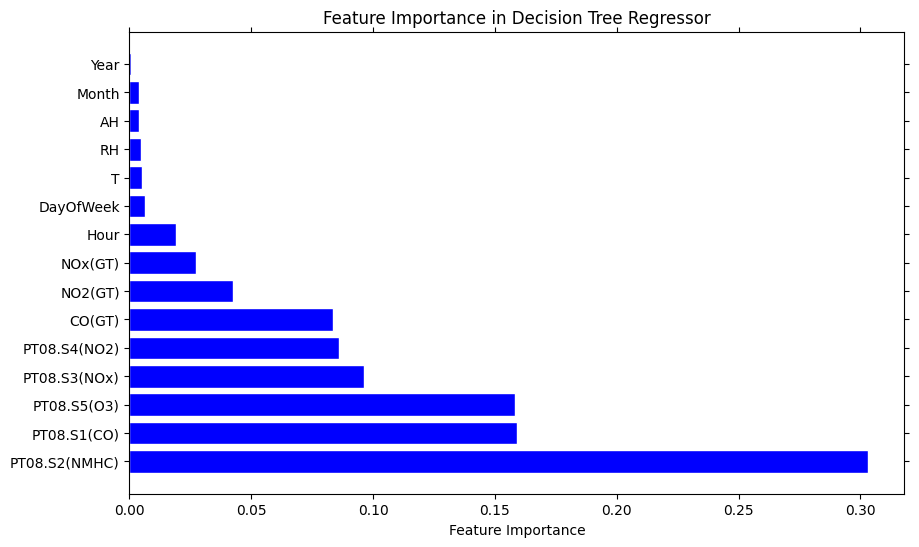

In [ ]:
feature_importances_RF = RF_model_2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_RF
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

* Again will use SHAP since i am interestead in both gloabl and local  effects.

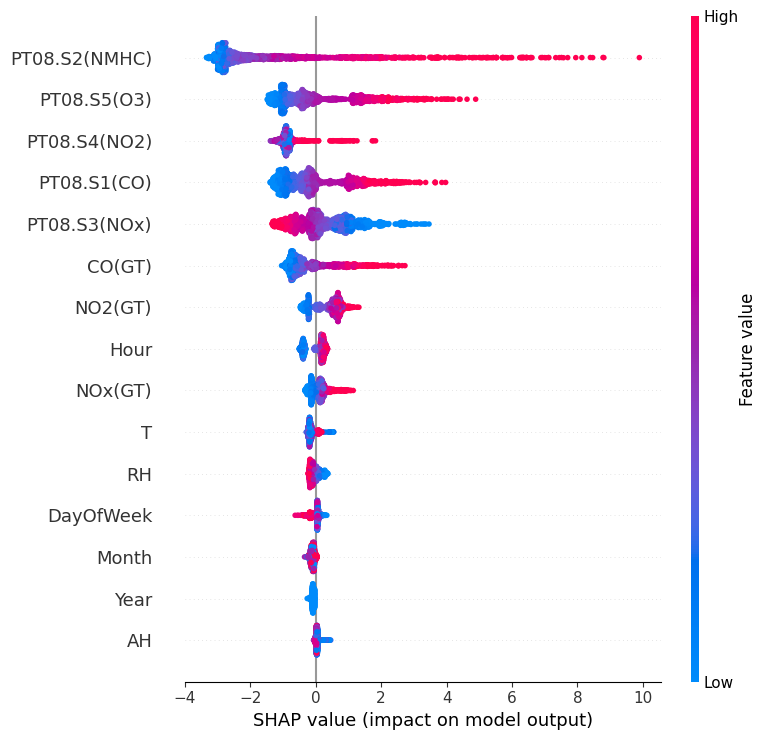

In [ ]:
explainer = shap.TreeExplainer(RF_model_2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[0], features=X_test.iloc[0])

Now i wonder are other features have more effect on our prediction due to Random  forest generator introducing randomness for each iteration of the estimator compared to DTR that only  took PT08.S2 as only important feature.

For now this is only what comes to mid. Will look again in theory.

##### C. Boosting Regressor

In [ ]:
xgb_model = XGBRegressor(random_state=32)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"XGBoost Training RMSE: {train_rmse}")
print(f"XGBoost Test RMSE: {test_rmse}")
print(f"XGBoost Test R2 Score: {test_r2}")

XGBoost Training RMSE: 0.03119915508484616
XGBoost Test RMSE: 0.20097445690289797
XGBoost Test R2 Score: 0.9990483508853842


###### Hyperparameter Tuning

In [ ]:
xgb_model_1 = XGBRegressor(
n_estimators=50,
    learning_rate=1.3,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.05,
    reg_lambda=1,
    random_state=117
)

xgb_model_1.fit(X_train, y_train)

y_train_pred = xgb_model_1.predict(X_train)
y_test_pred = xgb_model_1.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"XGBoost Training RMSE: {train_rmse}")
print(f"XGBoost Test RMSE: {test_rmse}")
print(f"XGBoost Test R2 Score: {test_r2}")

XGBoost Training RMSE: 0.28044748903024325
XGBoost Test RMSE: 1.0673961688148255
XGBoost Test R2 Score: 0.9731560513272823


In [ ]:
xgb_model_2 = XGBRegressor(
n_estimators=200,
    learning_rate=1.2,
    max_depth=10,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.05,
    reg_lambda=1,
    random_state=117
)

xgb_model_2.fit(X_train, y_train)

y_train_pred = xgb_model_2.predict(X_train)
y_test_pred = xgb_model_2.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"XGBoost Training RMSE: {train_rmse}")
print(f"XGBoost Test RMSE: {test_rmse}")
print(f"XGBoost Test R2 Score: {test_r2}")

XGBoost Training RMSE: 0.001965623280069317
XGBoost Test RMSE: 0.9316966591212785
XGBoost Test R2 Score: 0.9795476038185795


* Now compared to model_1 and model_2. I have raised number of estimators (it should incear model complexity) which resulted in some performance increase.
* Lowered a little learning rate alpha which also have huge impact between underfitting and overfitting (for this part i would try to find a way to automate process  to chose best value for alpha isnstead to set it manually).
* subsample is part of data used in proces of  building each tree in order to evade overfitting.

###### Feature Importance

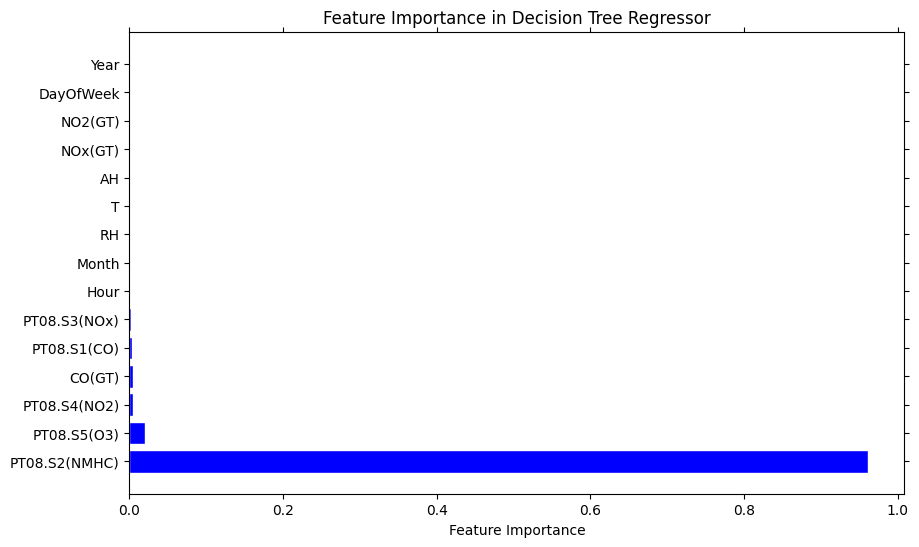

In [ ]:
feature_importances_XGB = xgb_model_2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_XGB
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

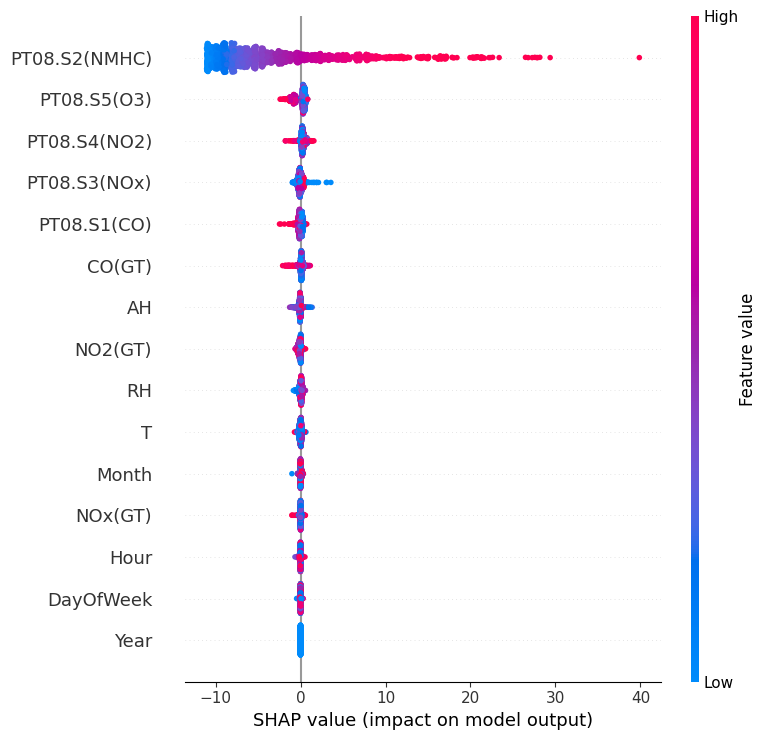

In [ ]:
explainer = shap.TreeExplainer(xgb_model_2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values[0], features=X_test.iloc[0])

* SO over all the biggest impact of PT08.S2 i constant in all models except that DTR only took that feature while  other models due to different iteration considered other feature also.

#### Classification Problem

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### A. Decision Tree Classifier

Accuracy: 79.34%
Confusion Matrix:
[[18260  2924]
 [ 2705  3362]]



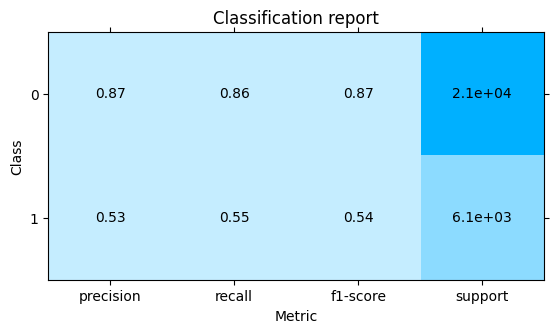

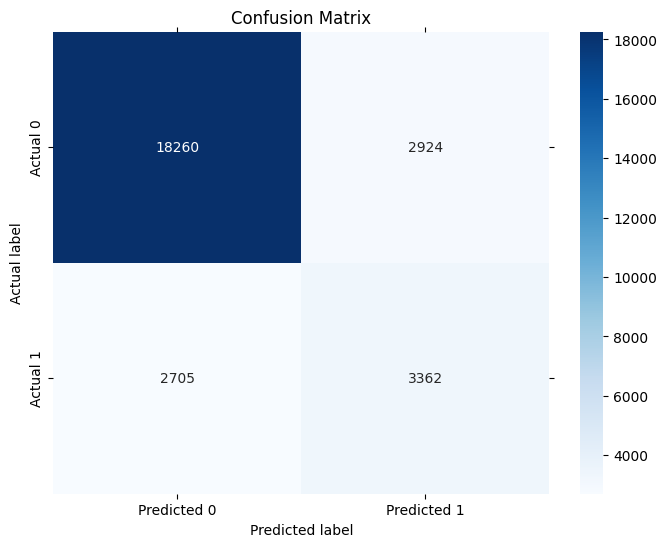

In [ ]:
X_class = df_classification.drop('RainTomorrow', axis=1)
y_class = df_classification['RainTomorrow']

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=55)
DTC_model = DecisionTreeClassifier(random_state=50)

DTC_model.fit(X_class_train, y_class_train)
y_class_pred = DTC_model.predict(X_class_test)

accuracy = accuracy_score(y_class_test, y_class_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cr_dt = plot.ClassificationReport.from_raw_data(
    y_class_test, y_class_pred, target_names=['0', '1']
)
print(cr_dt)

# Plotting Confusion Matrix
cm = confusion_matrix(y_class_test, y_class_pred)
print(f'Confusion Matrix:\n{cm}\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

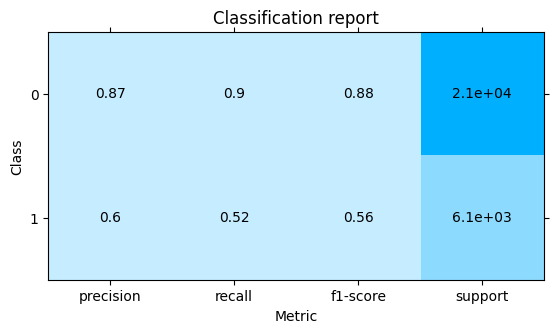

In [ ]:
DTC_model_1 = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=34
)

DTC_model_1.fit(X_class_train, y_class_train)

y_test_pred_tuned_1 = DTC_model_1.predict(X_class_test)

cr_dt = plot.ClassificationReport.from_raw_data(
    y_class_test, y_test_pred_tuned_1, target_names=['0', '1']
)
cr_dt

Precision of class 1  is not really good. Our target feature is imbalanced so now i will add  weights in order to deal see how it behave.

Whit weight i want to try and adjust model bias toward classes.

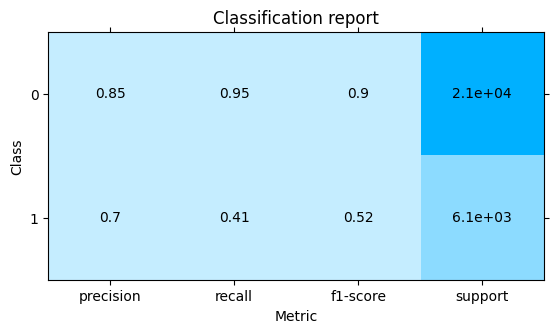

In [ ]:
weights = {0:4.5, 1:1.3}

DTC_model_2 = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=34,
    class_weight=weights
)

DTC_model_2.fit(X_class_train, y_class_train)

y_test_pred_tuned_1 = DTC_model_2.predict(X_class_test)

cr_dt = plot.ClassificationReport.from_raw_data(
    y_class_test, y_test_pred_tuned_1, target_names=['0', '1']
)
cr_dt

* Now after quite dozen trys to tune parameters and weights to penalize for each class missclasification this is the best score  i could get.

* Focus was to get best precision possible for both classe. While  i manage to get 9.0 for class 0 at same time precision would fall bellow 0.5. It is like prediction for class on i "stuck"  to be lower from class 0. Reason for that is probably that data is so much imbalanced that even with weights (where i force model to adjust its bias didn't help it)

* for class 1 values of 0.41 for recall and 0.52 for f1-score is proof that data is really imbalnced a lot.

###### Feature importance

And for  the last part  to see feature importance for my DTC

Due too many features ill  focus on first 10 that have most impact

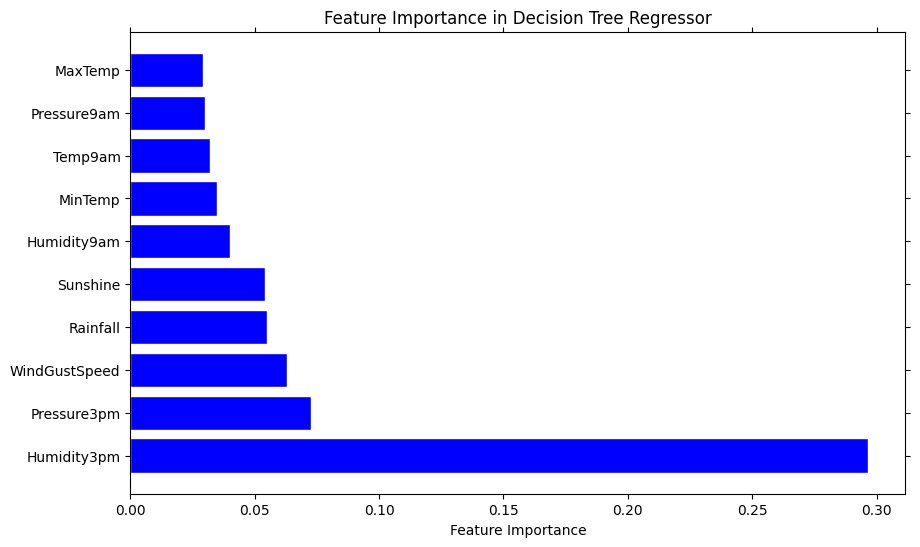

In [ ]:
feature_importances_DTC = DTC_model_2.feature_importances_

feature_importance_DTC = pd.DataFrame({
    'Feature': X_class_train.columns,
    'Importance': feature_importances_DTC
})

feature_importance_DTC = feature_importance_DTC.nlargest(10, 'Importance')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_DTC['Feature'], feature_importance_DTC['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

* Humidity, pressure, windspeed are top 3 important feature but humidity is the most important which in reallity is good indicator for the rain.

##### B. Random Forest Classifier


Confusion Matrix:
[[20563   621]
 [ 3692  2375]]



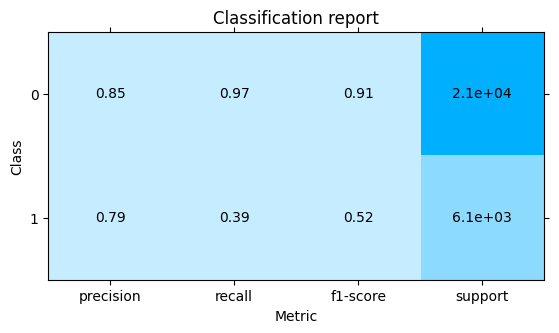

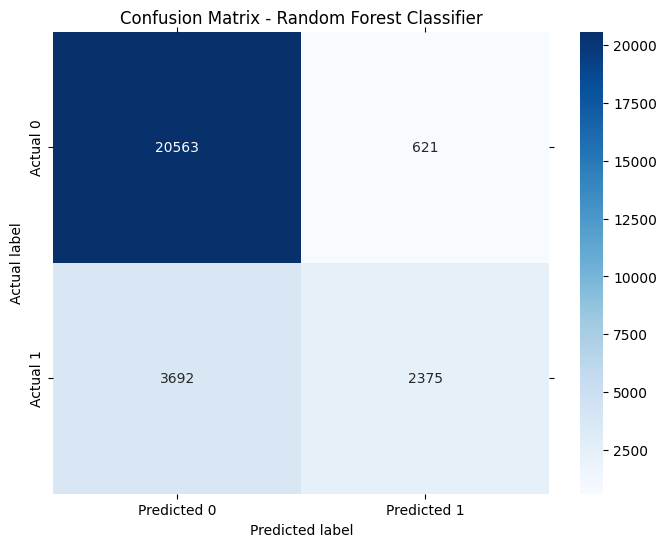

In [ ]:
RFC_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=34
)

RFC_model.fit(X_class_train, y_class_train)
y_class_RFC_pred = RFC_model.predict(X_class_test)

cr_dt = plot.ClassificationReport.from_raw_data(
    y_class_test, y_class_RFC_pred, target_names=['0', '1']
)
print(cr_dt)

cm = confusion_matrix(y_class_test, y_class_RFC_pred)
print(f'Confusion Matrix:\n{cm}\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

* Now let's see with weights and hyperparameters tuned a little:

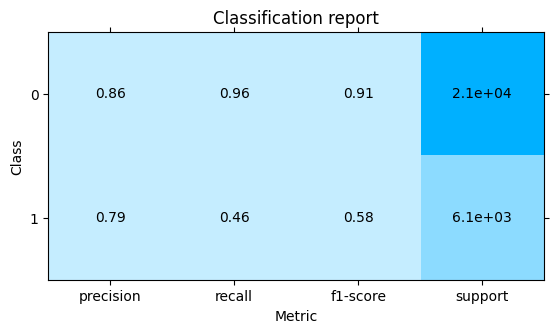

In [ ]:
weights = {0:1.0, 1:100.0}

RFC_model_1 = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=34
)

RFC_model_1.fit(X_class_train, y_class_train)
y_class_RFC_pred = RFC_model_1.predict(X_class_test)

cr_dt = plot.ClassificationReport.from_raw_data(
    y_class_test, y_class_RFC_pred, target_names=['0', '1']
)
print(cr_dt)

###### Feature Importance

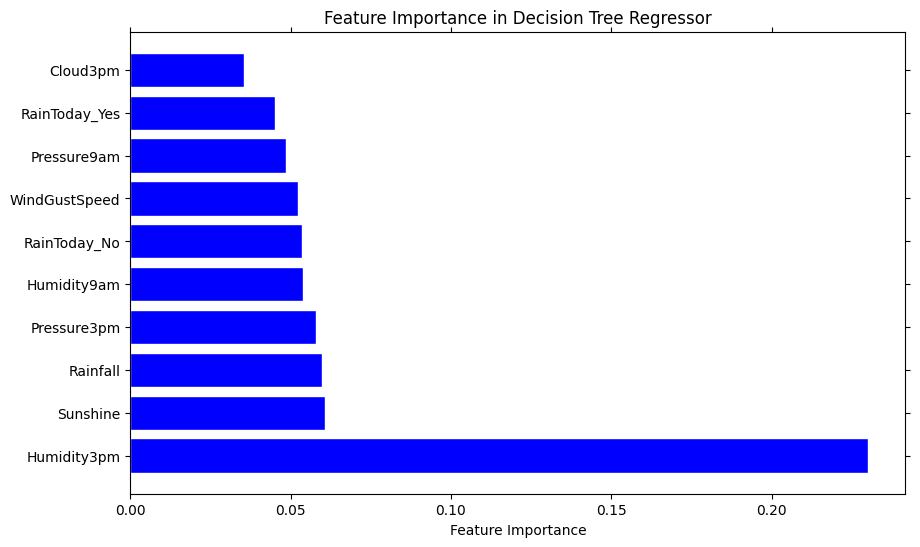

In [ ]:
feature_importances_RFC = RFC_model_1.feature_importances_

feature_importance_DTC = pd.DataFrame({
    'Feature': X_class_train.columns,
    'Importance': feature_importances_RFC
})

feature_importance_DTC = feature_importance_DTC.nlargest(10, 'Importance')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_DTC['Feature'], feature_importance_DTC['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

##### C. Boosting Classifier

Confusion Matrix:
[[20132  1052]
 [ 2611  3456]]



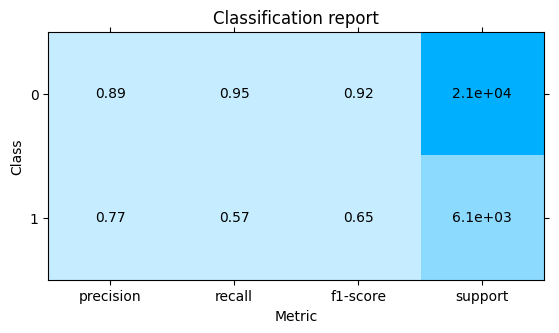

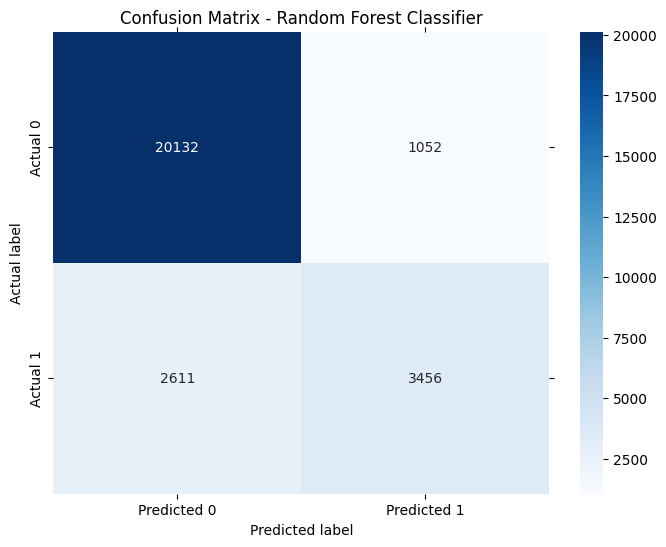

In [ ]:
XGB_model = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    random_state=34
)

XGB_model.fit(X_class_train, y_class_train)

y_class_XGB_pred = XGB_model.predict(X_class_test)

cr_dt = plot.ClassificationReport.from_raw_data(
    y_class_test, y_class_XGB_pred, target_names=['0', '1']
)
print(cr_dt)

cm = confusion_matrix(y_class_test, y_class_XGB_pred)
print(f'Confusion Matrix:\n{cm}\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

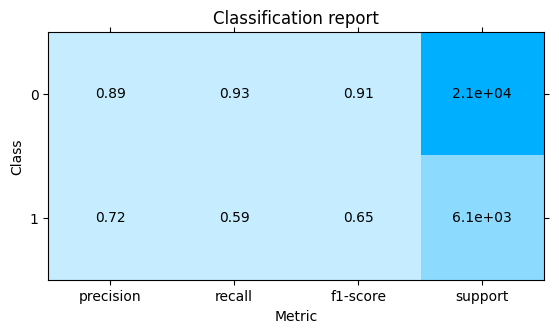

In [ ]:
weights = {0:1.0, 1:100.0}

XGB_model_1 = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.6,
    random_state=34
)

XGB_model_1.fit(X_class_train, y_class_train)
y_class_RFC_pred = XGB_model_1.predict(X_class_test)

cr_dt = plot.ClassificationReport.from_raw_data(
    y_class_test, y_class_RFC_pred, target_names=['0', '1']
)
print(cr_dt)

###### Feature Importance

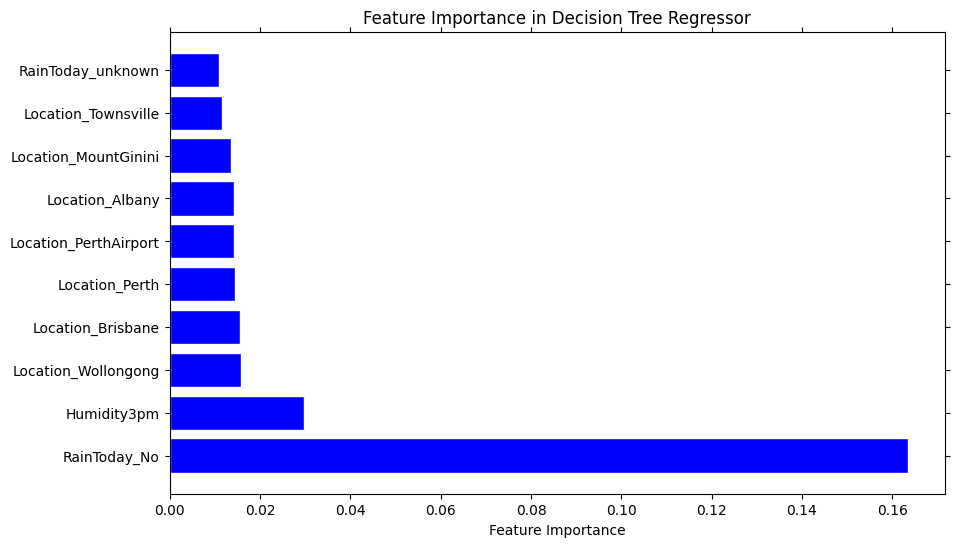

In [ ]:
feature_importances_XGB = XGB_model_1.feature_importances_

feature_importance_DTC = pd.DataFrame({
    'Feature': X_class_train.columns,
    'Importance': feature_importances_XGB
})

feature_importance_DTC = feature_importance_DTC.nlargest(10, 'Importance')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_DTC['Feature'], feature_importance_DTC['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

* Now this time RainToday  is  more important compared  to RFC i RTC models.


Comparesment to data from classification HW is  not possible for several reasons. Due to data leaking and mistakes i did in HW before  this one i had really bad model performance compared to these models.

This time (after complete rework of last HW approach and theory) i tryed not to have data leaks and overall performance (accuracy) is not bad i think. Still  there is effects that can not be "negated" with weights due to highly imbalanced data.

I hope this time quality is much better compared to last homework.